In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
plt.style.use("seaborn-darkgrid")
np.set_printoptions(precision=2)
pd.set_option("display.precision", 2)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_80281/423997370.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


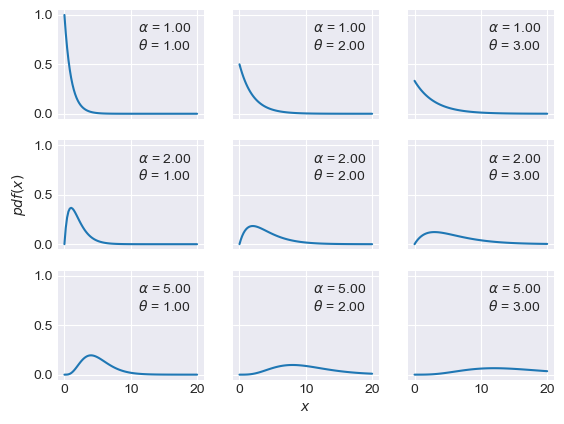

In [2]:
rates = [1, 2, 5]
scales = [1, 2, 3]

x = np.linspace(0, 20, 100)
f, ax = plt.subplots(len(rates), len(scales), sharex=True, sharey=True)
for i in range(len(rates)):
    for j in range(len(scales)):
        rate = rates[i]
        scale = scales[j]
        rv = stats.gamma(a=rate, scale=scale)
        ax[i,j].plot(x, rv.pdf(x))
        ax[i,j].plot(0, 0, label=f"$\\alpha$ = {rate:3.2f}\n$\\theta$ = {scale:3.2f}", alpha=0)
        ax[i,j].legend()

ax[2,1].set_xlabel("$x$")
ax[1,0].set_ylabel("$pdf(x)$")
plt.savefig("img401.png")

### 人口データの生成
- 線形回帰を行うデータを作る

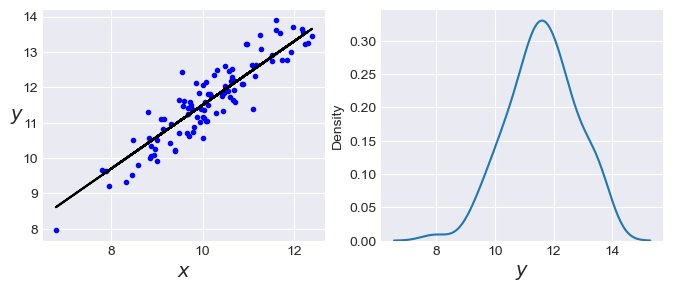

In [3]:
np.random.seed(314)
N = 100
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alfa_real + beta_real * x
y = y_real + eps_real

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.plot(x, y_real, "k")
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel("$y$", fontsize=14)
plt.savefig("img403.png")

In [4]:
with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=1)
    epsilon = pm.HalfCauchy("epsilon", 5)

    mu = pm.Deterministic("mu", alpha + beta * x)
    y_pred = pm.Normal("y_pred", mu=mu, sigma=epsilon, observed=y)
    # y_pred = pm.Normal("y_pred", mu=alpha+beta*x, sigma=epsilon, observed=y

    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(draws=11000, step=step, start=start, 
                      tune=1000, chains=1,
                      return_inferencedata=True)

/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_80281/3689488610.py:12: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  trace = pm.sample(draws=11000, step=step, start=start, tune=1000, chains=1)
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 1 chain for 1_000 tune and 11_000 draw iterations (1_000 + 11_000 draws total) took 1 seconds.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/base.py:220: UserWarning: More chains (11000) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Only one chain was sampled, this makes it impossible to run some convergence checks


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 11000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.72,0.38,0.96,2.38,9.30e-02,6.70e-02,18.0,27.0,NaN
beta,0.98,0.04,0.91,1.05,9.00e-03,7.00e-03,18.0,29.0,NaN
epsilon,0.47,0.03,0.41,0.54,1.00e-03,1.00e-03,1418.0,1299.0,NaN
mu[0],11.66,0.05,11.57,11.75,1.00e-03,1.00e-03,3080.0,2550.0,NaN
mu[1],9.98,0.08,9.84,10.13,1.50e-02,1.10e-02,25.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...
mu[95],11.06,0.05,10.96,11.16,5.00e-03,3.00e-03,113.0,1132.0,NaN
mu[96],13.13,0.07,12.99,13.27,1.40e-02,1.00e-02,29.0,74.0,NaN
mu[97],9.41,0.09,9.22,9.58,2.10e-02,1.50e-02,21.0,34.0,NaN
mu[98],12.16,0.05,12.06,12.26,5.00e-03,3.00e-03,129.0,1555.0,NaN


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/base.py:220: UserWarning: More chains (11000) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


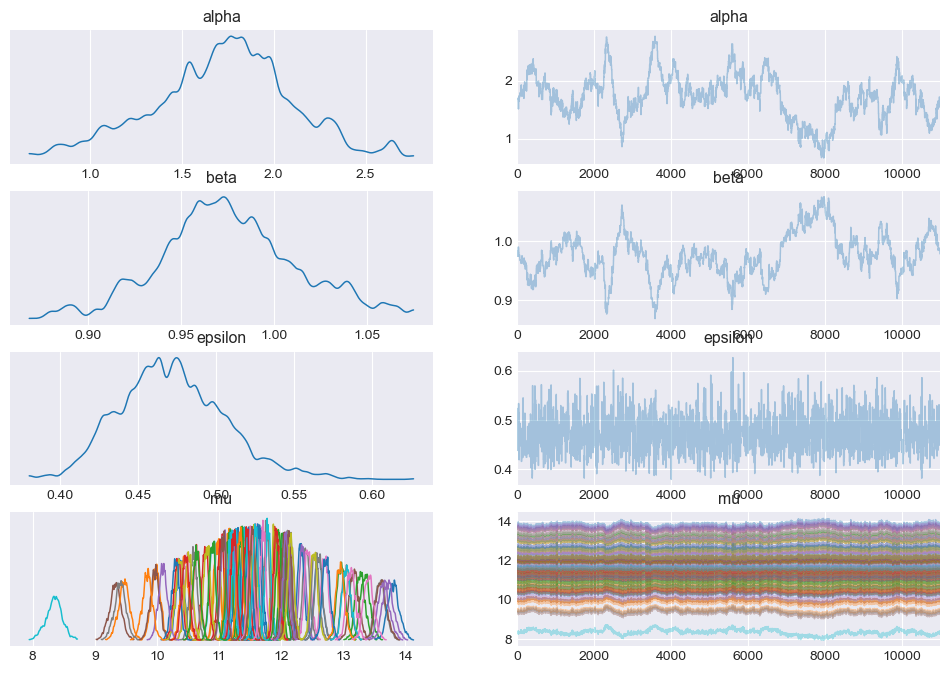

In [5]:
df = az.summary(trace)
display(df)

az.plot_trace(trace)
plt.savefig("img404.png")


In [6]:
trace["alpha"][1000:]

array([1.66, 1.66, 1.66, ..., 1.64, 1.7 , 1.7 ])

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/base.py:220: UserWarning: More chains (11000) than draws (3). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


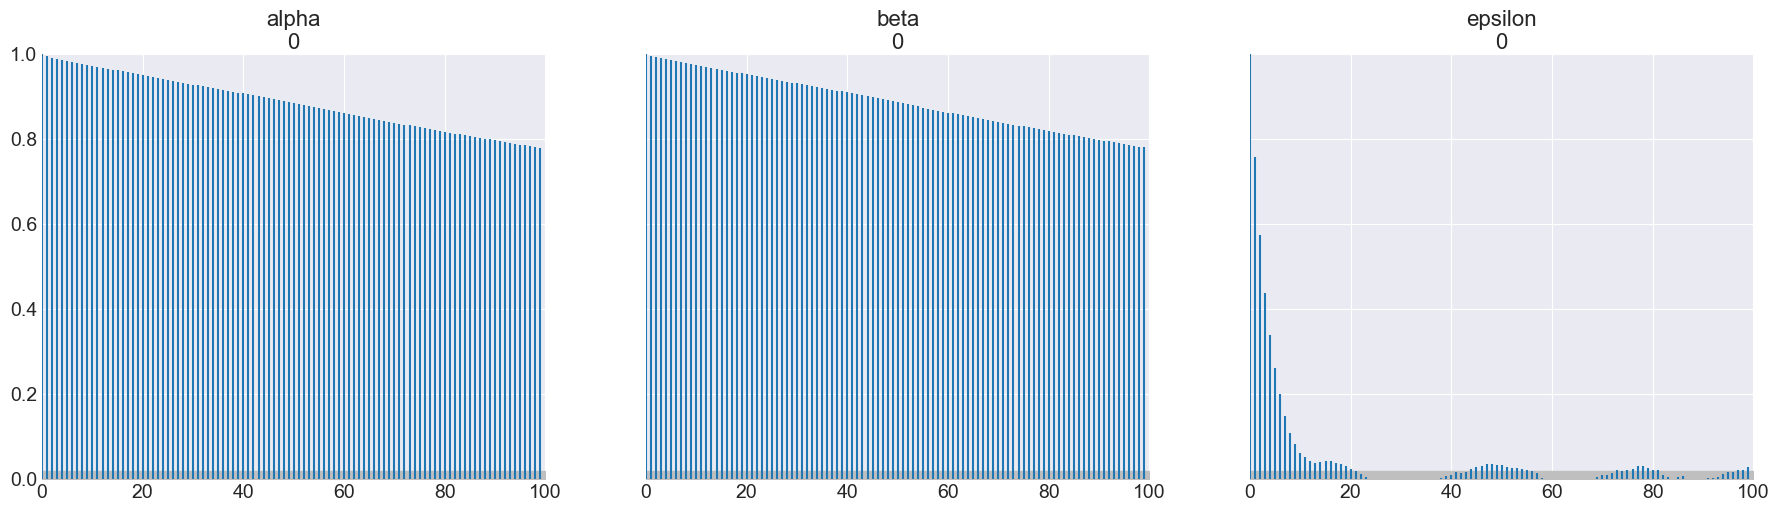

In [7]:
varnames = ["alpha", "beta", "epsilon"]
pm.plot_autocorr(trace, varnames)
plt.ylim([0, 1])
plt.savefig("img405.png")

### パラメータ$\alpha$と$\beta$の事後分布のKDEを出力する
- 上で見た自己相関は、線形回帰という仮定によって$\alpha$と$\beta$の間に相関が生まれたことの結果であったことを見る
    * →対角線のように細い線になっていることがわかる。MHサンプラーにとっては今後問題になる。提案値がほとんど外れてしまう。

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


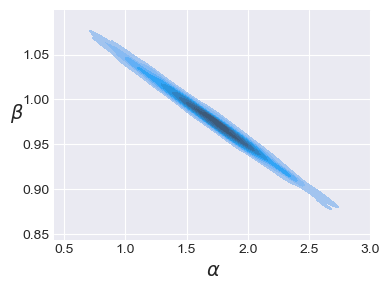

In [8]:
plt.figure(figsize=(4,3))
sns.kdeplot(x=trace["alpha"][1000:], 
            y=trace["beta"][1000:],
            linewidth=1,
            fill=True,
            )
plt.xlabel(r"$\alpha$", fontsize=14)
plt.ylabel(r"$\beta$", fontsize=14, rotation=0)
plt.tight_layout()
plt.show()

## 4.1.4 事後分布の解釈と視覚化

alpha_m=1.72135014102181, beta_m=0.9757476496669587


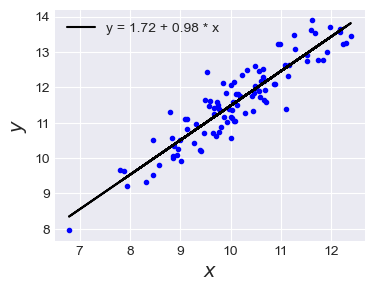

In [9]:
plt.figure(figsize=(4,3))
plt.plot(x, y, "b.")
alpha_m = trace["alpha"].mean()
beta_m = trace["beta"].mean()
print(f"{alpha_m=}, {beta_m=}")
plt.plot(x, alpha_m + beta_m * x, 
         c="k", 
         label=f"y = {alpha_m:.2f} + {beta_m:.2f} * x"
         )
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(loc=2, fontsize=10)
plt.savefig("img407.png")

### 平均$\alpha$と平均$\beta$による回帰直線の不確実性を示す
- 不確実性は中心付近で小さくなるが、１点に集中するわけではない！
- 事後分布は、データの平均値を正確に通るわけではない直線とうまく適合している。

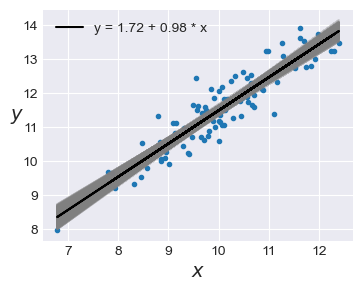

In [10]:
plt.figure(figsize=(4,3))
plt.plot(x, y, "C0.")
idx = range(0, len(trace["alpha"]), 10)
plt.plot(x, trace["alpha"][idx] + trace["beta"][idx] * x[:,np.newaxis], 
         c="gray", alpha=0.3)
plt.plot(x, alpha_m + beta_m * x, 
         c="k", 
         label=f"y = {alpha_m:.2f} + {beta_m:.2f} * x"
         )
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc=2, fontsize=10)
plt.savefig("img408.png")

In [11]:
ppc = pm.sample_posterior_predictive(trace, samples=2000, model=model)

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_80281/2254439213.py:18: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci_95 = az.hdi(ppc['y_pred'], hdi_prob=0.95)[idx]
/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_80281/2254439213.py:19: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci_50 = az.hdi(ppc['y_pred'], hdi_prob=0.50)[idx]


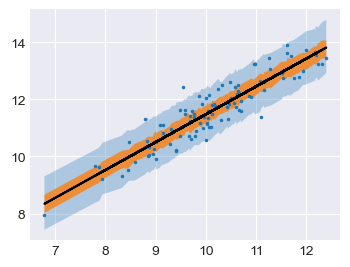

In [12]:
# 別の書き方
plt.figure(figsize=(4,3))
plt.plot(x, y, "C0.", markersize=3)
plt.plot(x, alpha_m + beta_m * x, 
         c="k", 
         label=f"y = {alpha_m:.2f} + {beta_m:.2f} * x"
         )
idx = np.argsort(x)
x_ord = x[idx]
# sig = pm.stats.hpd(trace.posterior["mu"], alpha=0.02)[idx]
# sig = pm.hpd(trace["mu"], alpha=0.02)[idx]
# sig = az.hdi(x, trace['mu'], hdi_prob=0.98, color='k')
# sig = az.hdi(x, var_names="mu", hdi_prob=0.98)
# plt.fill_between(x, sig[:,0], sig[:,1], color="gray")
# plt.xlabel("$x$", fontsize=14)
# plt.ylabel("$y$", fontsize=14, rotation=0)
# plt.savefig("img409.png")
ci_95 = az.hdi(ppc['y_pred'], hdi_prob=0.95)[idx]
ci_50 = az.hdi(ppc['y_pred'], hdi_prob=0.50)[idx]
# az.plot_hpd(x, trace['mu'], credible_interval=0.98, color='k')
plt.fill_between(x_ord, 
                 ci_95[:,0], ci_95[:,1],
                 alpha=0.3, 
                 label='95%HPD')
plt.fill_between(x_ord, 
                 ci_50[:,0], ci_50[:,1],
                 alpha=0.8, 
                 label='95%HPD')
# print(f"{type(sig)=}")
# print(f"{sig=}")

In [13]:
ppc = pm.sample_posterior_predictive(trace, samples=2000, model=model)

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


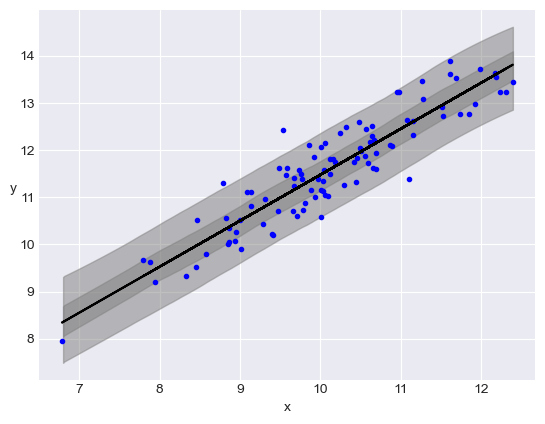

In [14]:
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

az.plot_hdi(x, ppc['y_pred'], hdi_prob=0.5, color='gray')
az.plot_hdi(x, ppc['y_pred'], color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.savefig('img410.png', dpi=300)

In [15]:
az.r2_score(y, ppc['y_pred'])

r2        0.75
r2_std    0.03
dtype: float64

## 4.3 階層線形回帰
- ここのグループレベルでの推定、グループ全体レベルでの推定
- いくつかのグループを同時にモデル化できる
- ハイパー事前分布を導入する

1. まず階層化してないモデル＝非階層モデルでやってみる：うまくいかない -> **一点データに直線をフィットさせようとしてるから**
1. 階層化してみる：驚き！
    * 階層化することで、グループ間に情報共有がなされる。

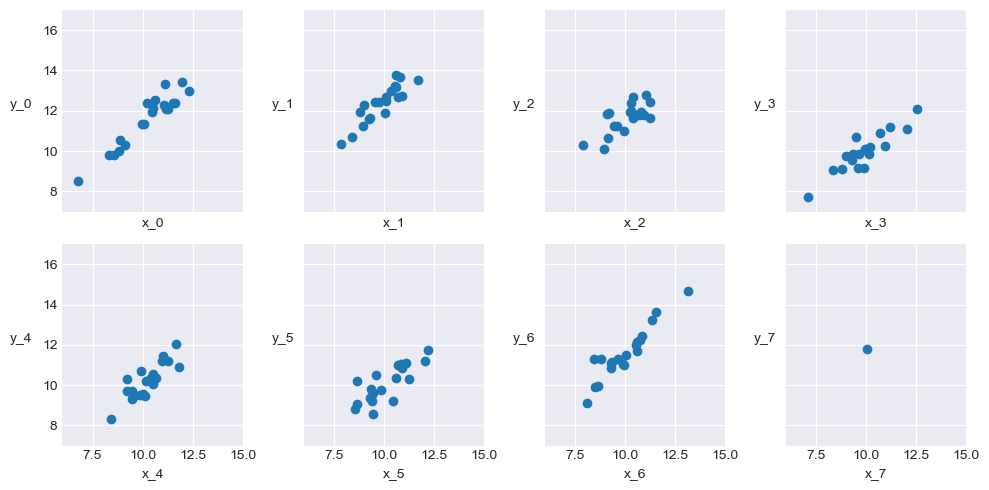

In [16]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
ax = np.ravel(ax)
j, k = 0, N
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', rotation=0, labelpad=15)
    ax[i].set_xlim(6, 15)
    ax[i].set_ylim(7, 17)
    j += N
    k += N
plt.tight_layout()
plt.savefig('B11197_03_13.png', dpi=300)

In [17]:
#　中心化
x_centered = x_m - x_m.mean()

In [23]:
# まず、非階層モデルにフィットさせてみる
with pm.Model() as unpooled_model:
    alpha_tmp = pm.Normal("alpha_tmp", mu=0, sigma=10, shape=M)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=M)
    epsilon = pm.HalfCauchy("epsilon", 5)
    nu = pm.Exponential("nu", 1/30)
    y_pred = pm.StudentT("y_pred", 
                         mu=alpha_tmp[idx]+beta[idx]*x_centered,
                         sigma=epsilon,
                         nu=nu,
                         observed=y_m,
                         )
    alpha = pm.Deterministic("alpha", alpha_tmp-beta*x_m.mean())

    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_up = pm.sample(draws=2000, 
                         step=step, 
                         initvals=start,   # <- startではなく、initvalsが正しいらしい.. warningによると。
                         return_inferencedata=True,
                         cores=2)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, epsilon, beta, alpha_tmp]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 6 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


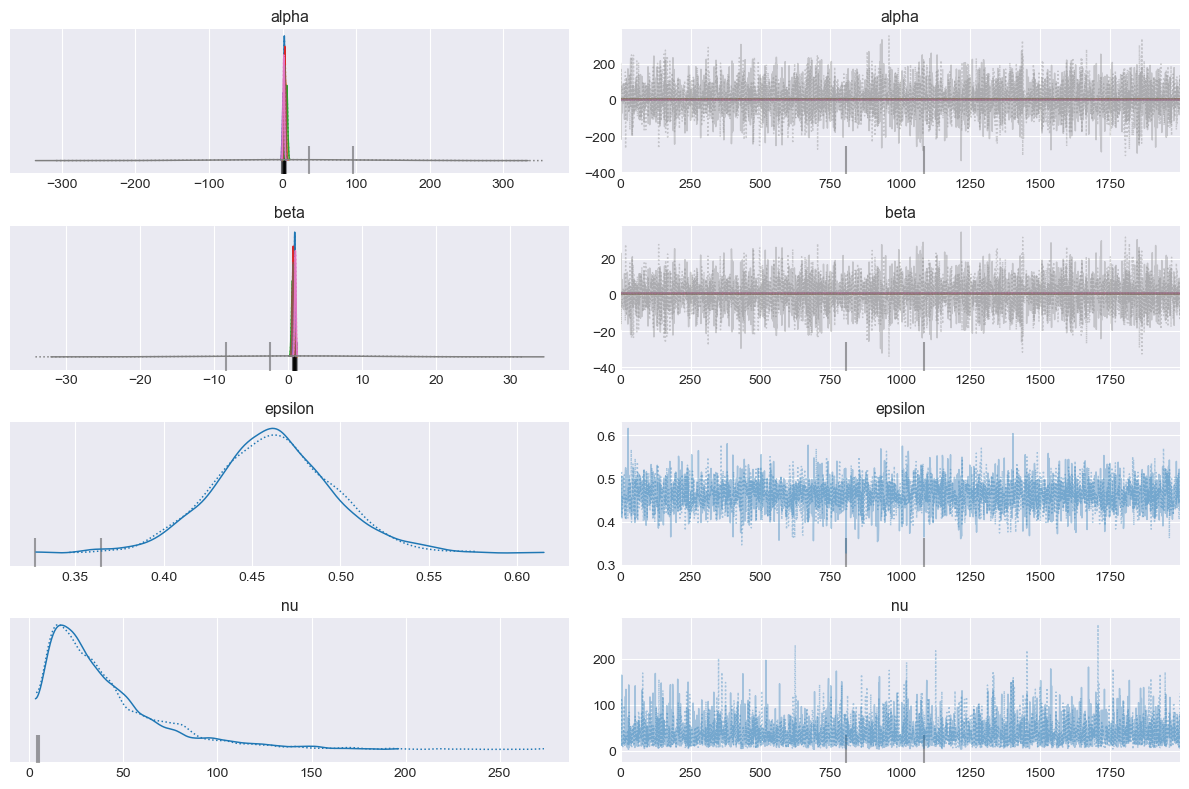

In [25]:
varnames = ["alpha", "beta", "epsilon", "nu"]
az.plot_trace(trace_up, varnames)
plt.tight_layout()
plt.savefig("img418.png")

In [48]:
# 階層モデルで再構築
with pm.Model() as hierarchical_model:
    # hyper-priors
    alpha_tmp_mu = pm.Normal("alpha_tmp_mu", mu=0, sigma=10)
    alpha_tmp_sd = pm.HalfNormal("alpha_tmp_sd", sigma=10)
    beta_mu = pm.Normal("beta_mu", mu=10, sigma=10)
    beta_sd = pm.HalfNormal("beta_sd", sigma=10)

    # priors
    alpha_tmp = pm.Normal("alpha_tmp", 
                          mu=alpha_tmp_mu, 
                          sigma=alpha_tmp_sd,
                          shape=M)
    beta = pm.Normal("beta", mu=beta_mu, sigma=beta_sd, shape=M)
    epsilon = pm.HalfCauchy("epsilon", 5)
    nu = pm.Exponential("nu", 1/30)

    y_pred = pm.StudentT("y_pred", mu=alpha_tmp[idx] + beta[idx] * x_centered,
                         sigma=epsilon,
                         nu=nu,
                         observed=y_m)

    alpha = pm.Deterministic("alpha", alpha_tmp - beta * x_m.mean())
    alpha_mu = pm.Deterministic("alpha_mu", alpha_tmp_mu - beta_mu * x_m.mean())
    alpha_sd = pm.Deterministic("alpha_sd", alpha_tmp_sd - beta_mu * x_m.mean())

    trace_hm = pm.sample(draws=2000)

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, epsilon, beta, alpha_tmp, beta_sd, beta_mu, alpha_tmp_sd, alpha_tmp_mu]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.
There were 64 divergences after tuning. Increase `target_accept` or reparameterize.
There were 103 divergences after tuning. Increase `target_accept` or reparameterize.
There were 60 divergences after tuning. Increase `target_accept` or reparameterize.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


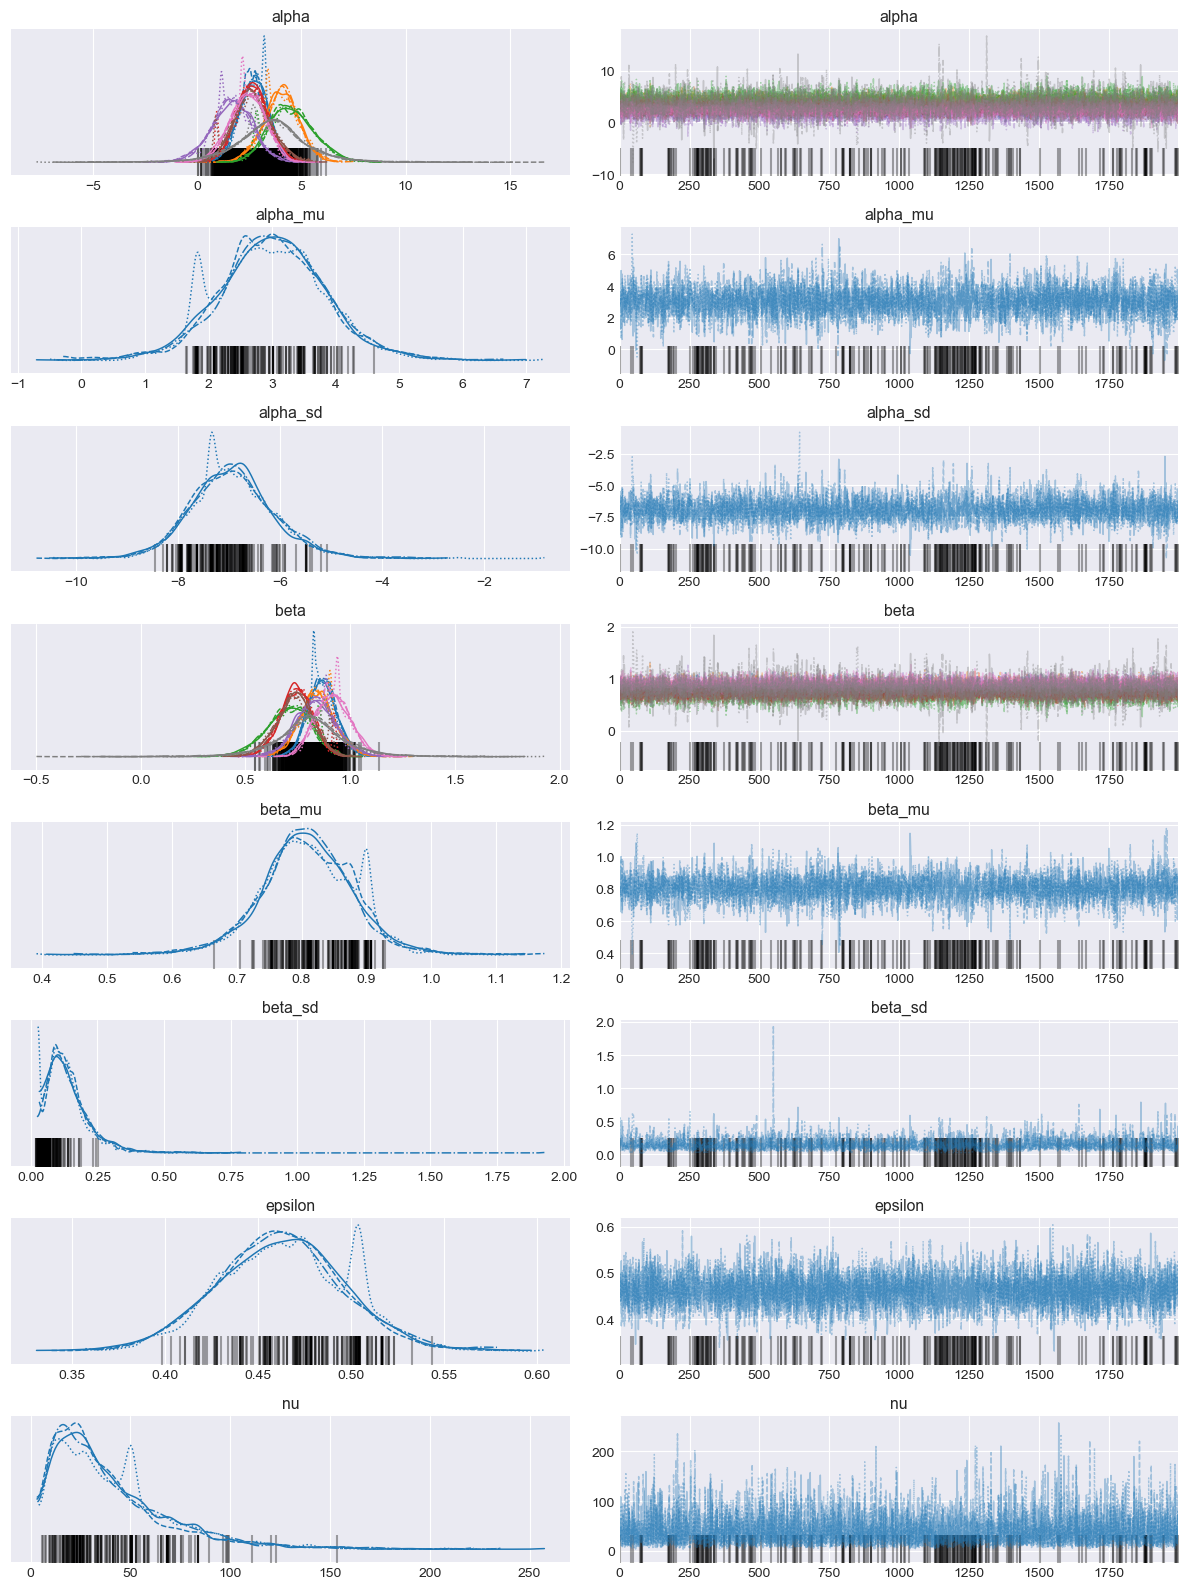

In [49]:
varnames = ["alpha", "alpha_mu", "alpha_sd", "beta", "beta_mu", "beta_sd", "epsilon", "nu"]
az.plot_trace(trace_hm, varnames)
plt.tight_layout()
plt.savefig("img420.png")

In [50]:
print(f"{x_m.min()=}")
print(f"{x_m.max()=}")
print(f"{N=}")

x_m.min()=6.786377512713057
x_m.max()=13.130642198220317
N=20


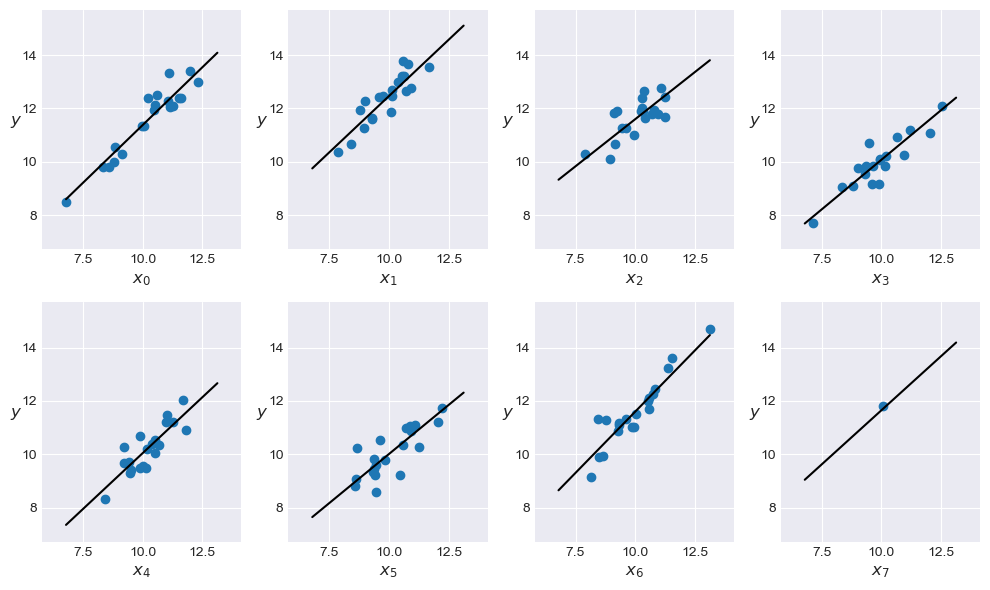

In [62]:
plt.figure(figsize=(10, 6))
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    plt.subplot(2,4,i+1)
    plt.scatter(x_m[j:k], y_m[j:k])
    plt.xlabel(f"$x_{i}$", fontsize=12)
    plt.ylabel(f"$y$", fontsize=12, rotation=0)
    alpha_m = trace_hm["alpha"][:,i].mean()
    beta_m = trace_hm["beta"][:,i].mean()
    plt.plot(x_range, alpha_m + beta_m * x_range,
             c="k", 
             label=f"y = {alpha_m:.2f} + {beta_m:.2f} * x")
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N
plt.tight_layout()
plt.savefig("img421png")
